# Decision Trees

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from mlxtend.plotting import plot_decision_regions

## Decision trees

แยกข้อมูลออกจากกันไปเรื่อย ๆ

## Decision tree classifiers

เริ่มจาก root node ที่เก็บทั้ง dataset เอาไว้ กำหนด threshold ต่าง ๆ ของแต่ละ feature มาแบ่ง dataset ออกเป็น 2 child node นำผลที่ได้จากการแบ่งแต่ละแบบมาคำนวณ gini index เฉลี่ยของทั้ง 2 child node ถ่วงน้ำหนักโดยจำนวนข้อมูลในแต่ละ node เลือกการแบ่งข้อมูลที่ทำให้ gini index เฉลี่ยต่ำสุด (child node บริสุทธิ์ที่สุด นั่นคือ มีปริมาณข้อมูลที่ถูก classified ผิดน้อยที่สุด) จากนั้นแบ่งข้อมูลใน child node ออกไปอีก ทำไปเรื่อย ๆ จนไม่เหลือ feature ใดที่แยกข้อมูลต่อได้อีก

<b>Gini index</b> เป็นค่าที่วัดความสามารถของ feature ในการแยกข้อมูลเป็น 2 ชุด

$$\text{Gini(node)} = 1 - \sum_{i=1}^N p_i^2$$

- $p_i$ = สัดส่วนของข้อมูลใน class $i$ ที่ถูกแยกไว้ใน node นั้น
- Gini index มีค่าระหว่าง 0 กับ 1
- Node ที่มี gini index น้อยกว่าจะบริสุทธิ์กว่า

พิจารณาตัวอย่าง tree classifier ในภาพด้านล่าง ซึ่งแบ่งดอกไม้ออกเป็น 3 กลุ่ม (Class 0, 1, 2) โดยใช้ "petal length" และ "petal width" feature และกำหนด threshold ไว้ที่ 2.45 และ 1.75 ตามลำดับ

<img src="../images/tree_classifier.png" width="500" /><br />

เราสามารถคำนวณ Gini index ของ root node กับ leaf node สีเขียวได้ดังนี้

$$\text{Gini(root node)} = 1 - \left[ \left(\frac{50}{150}\right)^2 + \left(\frac{50}{150}\right)^2 + \left(\frac{50}{150}\right)^2 \right] = 0.667$$

$$\text{Gini(green leaf node)} = 1 - \left[ \left(\frac{0}{54}\right)^2 + \left(\frac{49}{54}\right)^2 + \left(\frac{5}{54}\right)^2 \right] = 0.168$$

ดังนั้น leaf node สีเขียว บริสุทธิ์กว่า root node (leaf node สีเขียว มีปริมาณข้อมูลที่ถูก classified ผิด น้อยกว่าใน root node)

เมื่อได้ tree ที่ดีที่สุดแล้ว เราจะเอา test data มาทำนายโดยผ่านเข้าไปใน root node ลงไปหา internal node ที่เข้าเงื่อนไขเรื่อย ๆ จนถึง leaf node ตัวอย่างเช่น ถ้าข้อมูลของดอกไม้ดอกหนึ่งมี petal length = 4 และ petal width = 1 ใช้ tree ด้านบนทำนายจะได้ว่าดอกไม้นี้อยู่ใน Class 1

เมื่อ plot decision region จะเห็นได้ว่า decision boundary ตั้งฉากกัน

<img src="../images/decision_region_classifier.png" width="500" /><br />

การเพิ่ม tree depth จะสามารถทำให้ boundary ซับซ้อนขึ้น

<img src="../images/complicated_decision_regions.png" width="800" /><br />

เราสามารถสร้าง decision tree classifier ได้โดยใช้ `sklearn.tree.DecisionTreeClassifier`

In [13]:
# Load iris dataset and drop duplicates
iris = load_iris()
data = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=(iris['feature_names'] + ['target'])
).drop_duplicates()
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:
# Features (X) and target (y)
# Convert them to numpy arrays as required when ploting decision regions
X = data[['petal length (cm)', 'petal width (cm)']].values
y = data['target'].values.astype(int)

In [15]:
# Tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2).fit(X, y)

In [16]:
# Export tree
export_graphviz(tree_clf,
                out_file="../data/iris_tree.dot",
                feature_names=['petal length (cm)', 'petal width (cm)'],
                class_names=['0', '1', '2'],
                rounded=True,
                filled=True)

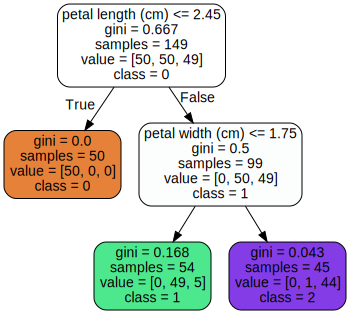

In [17]:
# Import tree
with open("../data/iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [18]:
# Make a prediction (petal length = 4, petal width = 1)
petal_length = 4
petal_width = 1
print("Class", tree_clf.predict([[petal_length, petal_width]]))

Class [1]


In [19]:
# predict_proba of a tree classifier doesn't return the probability of the outcome to be classified in each class
# but returns the proportion of flowers in each class are classified in the same class as the prediction
proportions_classified_in_class_1 = tree_clf.predict_proba([[petal_length, petal_width]])
print(proportions_classified_in_class_1)
print(np.allclose(proportions_classified_in_class_1, [[0/54, 49/54, 5/54]]))

[[0.         0.90740741 0.09259259]]
True


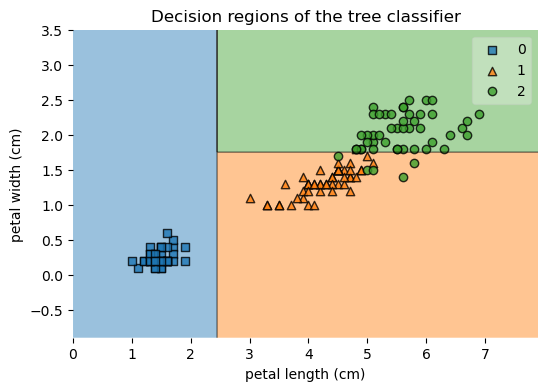

In [20]:
# Plot decision regions
fig, ax = plt.subplots(figsize=(6, 4))
fig = plot_decision_regions(X, y, clf=tree_clf)
ax.set(
    xlabel='petal length (cm)',
    ylabel='petal width (cm)',
    title='Decision regions of the tree classifier'
);

## Decision tree regressors

แบ่งข้อมูลออกเป็นสองฝั่งโดยใช้ threshold ค่าต่าง ๆ จากนั้นคำนวณ SSR (sum of square residuals = ผลรวมของกำลังสองของผลต่างระหว่างค่าจริงกับค่าเฉลี่ย) ของข้อมูลแต่ละฝั่ง แล้วเอามาเฉลี่ยกันถ่วงน้ำหนักด้วยจำนวนข้อมูลในแต่ละฝั่ง เลือก threshold ที่ทำให้ SSR เฉลี่ยต่ำสุด 

<img src="../images/training_tree_regressor.png" width="1000" /><br />

เมื่อได้ tree ที่ดีที่สุดแล้ว ค่าเฉลี่ยของ training data ในแต่ละ region จะถูกใช้เป็นค่าทำนาย

<img src="../images/tree_regressor.png" width="500" /><br />

เราสามารถสร้าง decision tree regressor ได้โดยใช้ `sklearn.tree.DecisionTreeRegressor`

## Dealing with overfitting

ถ้าสร้าง decision boundary มากเกินไปจะทำให้เกิด overfitting

<img src="../images/overfitting_trees.png" width="800" /><br />

วิธีแก้ คือต้องทำ hyperparameter tuning เพราะ default parameter มักจะทำให้ tree overfit

Parameter ที่สำคัญที่เราต้อง tune ให้ดี เช่น
- `min_samples_split` = จำนวนข้อมูลอย่างน้อยที่ต้องมีใน internal node หนึ่ง
- `max_depth` = ความลึกที่มากที่สุดของ tree มักไม่ควรเกิน 5
- `min_samples_leaf` = จำนวนข้อมูลอย่างน้อยที่ต้องมีใน leaf node หนึ่ง

## Pros and cons of decision trees

ข้อดีของ decision tree เช่น
- ไม่ต้องทำ scaling
- ไม่อ่อนไหวต่อ outlier
- ใช้งานง่าย และสามารถตีความผลลัพธ์ได้ง่าย
- ทำ feature selection ได้ (ใช้ gini-based `feature_importance_`)
- ใช้ทำ non-linear model

ข้อเสียของ decision tree เช่น
- high variance (ข้อมูลเปลี่ยนเพียงเล็กน้อยก็ทำให้ tree structure เปลี่ยน)
- training time เพิ่มขึ้นอย่างรวดเร็วเมื่อ `max_depth` เพิ่มขึ้น
- แบ่งข้อมูลได้แค่ในแนวตั้งฉากกับแกนของ feature

In [11]:
%%html
<iframe src="https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py" width="1200" height="1000" />